### Imports

In [1]:
import sys
mypath = "/home/basia/Documents/spectroscopy/magnetstein"
sys.path.insert(0, mypath)

In [2]:
import numpy as np
import pandas as pd
import os
from masserstein import NMRSpectrum, estimate_proportions
import matplotlib.pyplot as plt
import pulp
import pickle

### Data

In [3]:
experiment_name = 'PMG 284 monitoring'

In [4]:
mixture_path = '../../data/PMG_284/seria1.csv'

mixture_separator = '\t'

data_path = '../../data/PMG_284/'

#### Mixture in time

In [5]:
mixture_time_data = pd.read_csv(mixture_path, sep = mixture_separator).iloc[:,:-1]

In [6]:
mixture_time_data

,Unnamed: 0,seria1\nSTANDARD_PROTON_PARAMETERS\n_1,seria1\nSTANDARD_PROTON_PARAMETERS\n_2,seria1\nSTANDARD_PROTON_PARAMETERS\n_3,seria1\nSTANDARD_PROTON_PARAMETERS\n_4,seria1\nSTANDARD_PROTON_PARAMETERS\n_5,seria1\nSTANDARD_PROTON_PARAMETERS\n_6,seria1\nSTANDARD_PROTON_PARAMETERS\n_7,seria1\nSTANDARD_PROTON_PARAMETERS\n_8,seria1\nSTANDARD_PROTON_PARAMETERS\n_9,...,seria1\nSTANDARD_PROTON_PARAMETERS\n_991,seria1\nSTANDARD_PROTON_PARAMETERS\n_992,seria1\nSTANDARD_PROTON_PARAMETERS\n_993,seria1\nSTANDARD_PROTON_PARAMETERS\n_994,seria1\nSTANDARD_PROTON_PARAMETERS\n_995,seria1\nSTANDARD_PROTON_PARAMETERS\n_996,seria1\nSTANDARD_PROTON_PARAMETERS\n_997,seria1\nSTANDARD_PROTON_PARAMETERS\n_998,seria1\nSTANDARD_PROTON_PARAMETERS\n_999,seria1\nSTANDARD_PROTON_PARAMETERS\n_1000
0,0.000095,0.000162,-0.000244,0.000299,0.000668,0.000364,-0.000021,0.000714,0.000363,-0.000380,...,0.000109,-3.164280e-05,0.001029,0.000088,3.807970e-04,0.000326,0.000619,0.000180,0.000299,0.000362
1,0.000217,0.000112,-0.000031,0.000247,0.000716,0.000262,-0.000005,0.000816,0.000424,-0.000323,...,-0.000089,-5.876040e-05,0.001067,0.000101,3.119680e-04,0.000327,0.000821,-0.000022,0.000151,0.000589
2,0.000338,0.000037,0.000064,0.000235,0.000695,0.000298,0.000035,0.000613,0.000296,-0.000229,...,0.000044,7.600290e-06,0.001078,0.000135,2.413690e-04,0.000361,0.000795,-0.000087,-0.000019,0.000629
3,0.000460,-0.000037,-0.000099,0.000224,0.000516,0.000335,0.000075,0.000409,0.000168,-0.000135,...,0.000176,7.396100e-05,0.001090,0.000169,1.707700e-04,0.000396,0.000769,0.000187,-0.000188,0.000328
4,0.000581,-0.000020,-0.000189,0.000213,0.000346,0.000281,0.000116,0.000467,0.000197,-0.000207,...,0.000057,-7.774220e-07,0.001101,0.000137,1.001710e-04,0.000345,0.000669,0.000306,-0.000176,0.000017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49321,5.999480,0.000014,-0.000728,-0.000072,-0.000007,-0.000187,-0.000404,-0.000318,-0.000527,-0.000476,...,-0.000339,-1.443020e-04,0.000613,-0.000108,-5.259360e-07,0.000107,0.000113,0.000008,0.000382,-0.000002
49322,5.999600,0.000171,-0.000638,-0.000048,0.000183,-0.000141,-0.000458,-0.000251,-0.000225,-0.000251,...,-0.000003,1.528880e-04,0.000644,0.000061,-7.621520e-05,0.000536,0.000473,-0.000015,0.000350,0.000219
49323,5.999720,0.001375,0.000396,0.000714,0.001542,0.001230,0.000553,0.000848,0.001206,0.000903,...,0.001013,1.691750e-03,0.001920,0.001019,1.037880e-03,0.001932,0.001850,0.000753,0.001286,0.001464
49324,5.999850,0.002204,0.001431,0.001436,0.002435,0.002123,0.001386,0.001772,0.002091,0.001779,...,0.001611,2.609780e-03,0.002885,0.001850,2.020950e-03,0.002678,0.002578,0.001645,0.002210,0.002325


In [7]:
names = ['ppm'] + ['t' + str(nb) for nb in range(1, mixture_time_data.shape[1])]

In [8]:
mixture_time_data.columns = names

In [9]:
def load_spectrum(mixture_time_data, moment_of_time):
    ppm = mixture_time_data['ppm']
    intensity = mixture_time_data['t'+str(moment_of_time)]
    sp = NMRSpectrum(confs = list(zip(ppm, intensity)))
    return sp

In [10]:
%matplotlib notebook

<IPython.core.display.Javascript object>


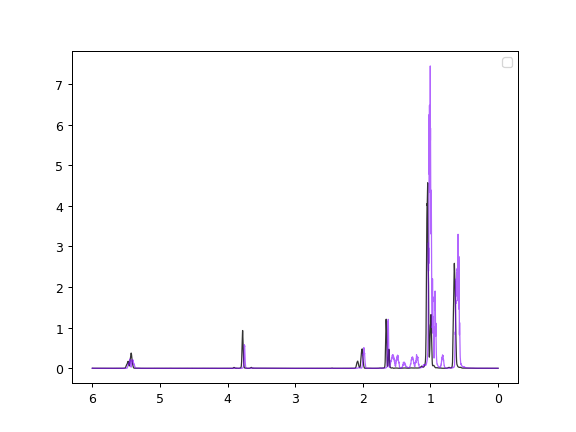

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [11]:
plt.gca().invert_xaxis()
NMRSpectrum.plot_all([load_spectrum(mixture_time_data, 1),
                     load_spectrum(mixture_time_data, 1000)], profile=True)

#### Reagents

In [12]:
reagents_sp = []

mix920 = pd.DataFrame(load_spectrum(mixture_time_data, 920).confs)

#2-pentene
reagent0 = mix920[mix920[0].apply(lambda x: (x>5.302060 and x<5.596931)
                                 )]
ppm = reagent0.iloc[:,0]
ints = reagent0.iloc[:,1]
reagents_sp.append(NMRSpectrum(confs = list(zip(ppm, ints))))



#triethylsilane                           
reagent1 = mix920[mix920[0].apply(lambda x: (x>3.598789 and x<3.920281)
                                 )]
ppm = reagent1.iloc[:,0]
ints = reagent1.iloc[:,1]
reagents_sp.append(NMRSpectrum(confs = list(zip(ppm, ints))))

#product                              
reagent2 = mix920[mix920[0].apply(lambda x: (x>0.814595 and x<0.889757) 
                                 )]
ppm = reagent2.iloc[:,0]
ints = reagent2.iloc[:,1]
reagents_sp.append(NMRSpectrum(confs = list(zip(ppm, ints))))

In [13]:
# #product
# Y: "Integral(0.636757,0.572970)",
# Y1: "Integral(0.889757,0.814595)"
# Y2: "Integral(0.982024,0.932107)"
# Y3: "Integral(1.046604,0.985144)"
# Y4: "Integral(1.263743,1.196043)"
# Y5: "Integral(1.345170,1.269046)"
# Y6: "Integral(1.458730,1.384479)"
# Y7: "Integral(1.549517,1.479633)"
# Y8: "Integral(1.635311,1.553885)"
    
# #triethylsilane
# Y9: "Integral(0.708841,0.638108)"
# Y10: "Integral(1.108528,1.048454)"
# Y11: "Integral(3.920281,3.598789)"
    
# #2-pentene
# Y12: "Integral(1.012637,0.971353)"
# Y13: "Integral(1.685043,1.598012)"
# Y14: "Integral(2.106522,1.964386)"
# Y15: "Integral(5.596931,5.302060)"

# all: "Integral(7.350003,0.326339)"


<IPython.core.display.Javascript object>


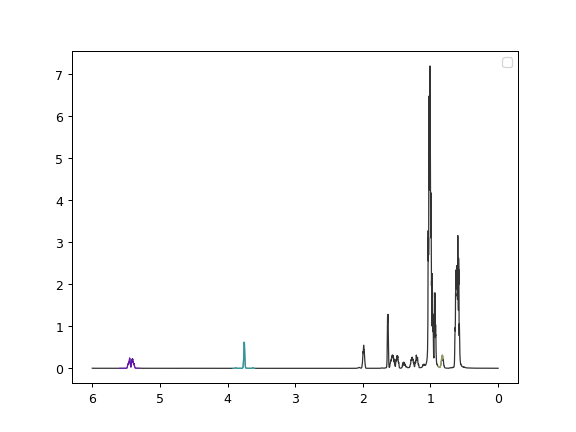

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [14]:
mix920_sp = load_spectrum(mixture_time_data, 920)
plt.gca().invert_xaxis()
#plt.xlim(1.8, 1.14)
NMRSpectrum.plot_all([mix920_sp] + reagents_sp, profile=True)

### Mixture

In [15]:
mixture_time_data = mixture_time_data[mixture_time_data['ppm'].apply(lambda x: 
                                                    (x>5.302060 and x<5.596931) or 
                                                    (x>3.598789 and x<3.920281) or 
                                                    (x>0.814595 and x<0.889757) 
                                 )]

<IPython.core.display.Javascript object>


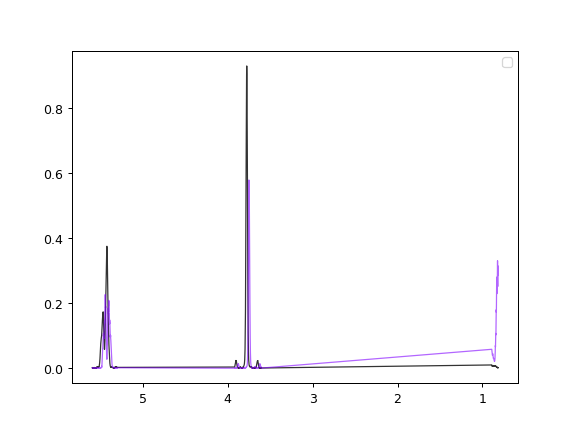

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [16]:
plt.gca().invert_xaxis()
NMRSpectrum.plot_all([load_spectrum(mixture_time_data, 1),
                 load_spectrum(mixture_time_data, 1000)], profile=True)

### Saving preprocessed spectra

In [17]:
np.savetxt(data_path + 'preprocessed_pentene.csv', reagent0, delimiter = '\t')
np.savetxt(data_path + 'preprocessed_triethylsilane.csv', reagent1, delimiter = '\t')
np.savetxt(data_path + 'preprocessed_product.csv', reagent2, delimiter = '\t')
np.savetxt(data_path + 'preprocessed_mixture.csv', mixture_time_data, delimiter = '\t')